In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from datetime import datetime
import time

In [13]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [15]:
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [16]:
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [17]:
coordinates = list(lat_lngs)

In [18]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [19]:
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

# city_weather = requests.get(city_url)
# city_weather

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a9ed58a798c9db1f29eb000ba1ac680


In [20]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | busselton
Processing Record 2 of Set 13 | chuy
Processing Record 3 of Set 13 | avarua
Processing Record 4 of Set 13 | yellowknife
Processing Record 5 of Set 13 | kapaa
Processing Record 6 of Set 13 | geraldton
Processing Record 7 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 13 | punta arenas
Processing Record 9 of Set 13 | barrow
Processing Record 10 of Set 13 | castro
Processing Record 11 of Set 13 | ushuaia
Processing Record 12 of Set 13 | okandja
City not found. Skipping...
Processing Record 13 of Set 13 | dwarka
Processing Record 14 of Set 13 | port alfred
Processing Record 15 of Set 13 | puerto ayora
Processing Record 16 of Set 13 | rikitea
Processing Record 17 of Set 13 | saleaula
City not found. Skipping...
Processing Record 18 of Set 13 | hilo
Processing Record 19 of Set 13 | broome
Processing Record 20 of Set 13 | ribeira grande
Processing Record 21 o

Processing Record 35 of Set 16 | laguna de perlas
Processing Record 36 of Set 16 | amderma
City not found. Skipping...
Processing Record 37 of Set 16 | seversk
Processing Record 38 of Set 16 | monrovia
Processing Record 39 of Set 16 | stornoway
Processing Record 40 of Set 16 | harper
Processing Record 41 of Set 16 | meulaboh
Processing Record 42 of Set 16 | carutapera
Processing Record 43 of Set 16 | oparino
Processing Record 44 of Set 16 | alenquer
Processing Record 45 of Set 16 | udachnyy
Processing Record 46 of Set 16 | mys shmidta
City not found. Skipping...
Processing Record 47 of Set 16 | karkaralinsk
City not found. Skipping...
Processing Record 48 of Set 16 | cap-chat
Processing Record 49 of Set 16 | antofagasta
Processing Record 50 of Set 16 | vila franca do campo
Processing Record 1 of Set 17 | the valley
Processing Record 2 of Set 17 | nizhneyansk
City not found. Skipping...
Processing Record 3 of Set 17 | tougan
Processing Record 4 of Set 17 | sabang
Processing Record 5 of 

Processing Record 21 of Set 20 | burica
City not found. Skipping...
Processing Record 22 of Set 20 | sao gabriel da cachoeira
Processing Record 23 of Set 20 | guekedou
City not found. Skipping...
Processing Record 24 of Set 20 | bubaque
Processing Record 25 of Set 20 | sarkand
Processing Record 26 of Set 20 | east london
Processing Record 27 of Set 20 | ramhormoz
Processing Record 28 of Set 20 | henties bay
Processing Record 29 of Set 20 | karaul
City not found. Skipping...
Processing Record 30 of Set 20 | xianyang
Processing Record 31 of Set 20 | san patricio
Processing Record 32 of Set 20 | berezovyy
Processing Record 33 of Set 20 | amazar
Processing Record 34 of Set 20 | yabelo
Processing Record 35 of Set 20 | malanje
Processing Record 36 of Set 20 | lantana
Processing Record 37 of Set 20 | karratha
Processing Record 38 of Set 20 | padang
Processing Record 39 of Set 20 | namatanai
Processing Record 40 of Set 20 | hami
Processing Record 41 of Set 20 | pangnirtung
Processing Record 42

City not found. Skipping...
Processing Record 2 of Set 24 | ketchikan
Processing Record 3 of Set 24 | mecca
Processing Record 4 of Set 24 | savannah bight
Processing Record 5 of Set 24 | tumannyy
City not found. Skipping...
Processing Record 6 of Set 24 | finnsnes
Processing Record 7 of Set 24 | bollnas
Processing Record 8 of Set 24 | orange cove
Processing Record 9 of Set 24 | boundiali
Processing Record 10 of Set 24 | labrea
Processing Record 11 of Set 24 | cumbitara
Processing Record 12 of Set 24 | bela cruz
Processing Record 13 of Set 24 | derzhavinsk
Processing Record 14 of Set 24 | kalmar
Processing Record 15 of Set 24 | havoysund
Processing Record 16 of Set 24 | moree
Processing Record 17 of Set 24 | portland
Processing Record 18 of Set 24 | batsfjord
Processing Record 19 of Set 24 | goderich
Processing Record 20 of Set 24 | marzuq
Processing Record 21 of Set 24 | okhotsk
Processing Record 22 of Set 24 | zhanaozen
Processing Record 23 of Set 24 | tunduru
City not found. Skipping

In [21]:
len(city_data)

548

In [22]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,55.99,63,67,16.91,AU,2020-04-14 20:38:05
1,Chuy,-33.70,-53.46,58.75,87,100,25.28,UY,2020-04-14 20:38:05
2,Avarua,-21.21,-159.78,80.60,57,68,6.93,CK,2020-04-14 20:38:06
3,Yellowknife,62.46,-114.35,32.00,79,90,3.36,CA,2020-04-14 20:34:59
4,Kapaa,22.08,-159.32,79.00,78,20,8.05,US,2020-04-14 20:34:28
5,Geraldton,-28.77,114.60,62.60,82,40,9.17,AU,2020-04-14 20:35:58
6,Punta Arenas,-53.15,-70.92,53.60,66,75,11.41,CL,2020-04-14 20:35:04
7,Barrow,71.29,-156.79,12.20,92,90,4.70,US,2020-04-14 20:35:17
8,Castro,-24.79,-50.01,62.85,65,25,3.58,BR,2020-04-14 20:38:07
9,Ushuaia,-54.80,-68.30,48.20,70,40,5.70,AR,2020-04-14 20:33:20


In [27]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]

In [28]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2020-04-14 20:38:05,-33.65,115.33,55.99,63,67,16.91
1,Chuy,UY,2020-04-14 20:38:05,-33.70,-53.46,58.75,87,100,25.28
2,Avarua,CK,2020-04-14 20:38:06,-21.21,-159.78,80.60,57,68,6.93
3,Yellowknife,CA,2020-04-14 20:34:59,62.46,-114.35,32.00,79,90,3.36
4,Kapaa,US,2020-04-14 20:34:28,22.08,-159.32,79.00,78,20,8.05


In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

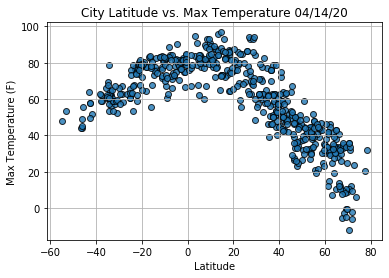

In [34]:
today = time.strftime("%x")
today 
# 
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

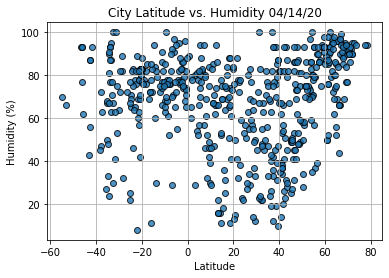

In [35]:
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

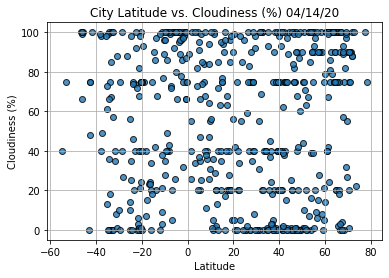

In [36]:
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

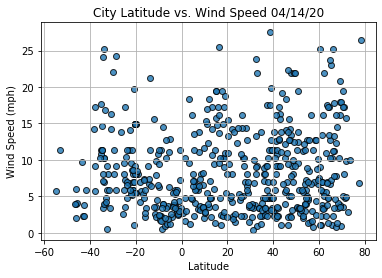

In [37]:
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()